<a href="https://colab.research.google.com/github/shradd-04/dadv_proj/blob/main/kmeanscluster5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pf=pd.read_csv('/content/sample_data/income.csv')
pf

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [ ]:
pf.shape

(22, 3)

In [ ]:
pf.isnull().sum()

,0
Name,0
Age,0
Income($),0


In [ ]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [ ]:
pf.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


Text(0, 0.5, 'Income')

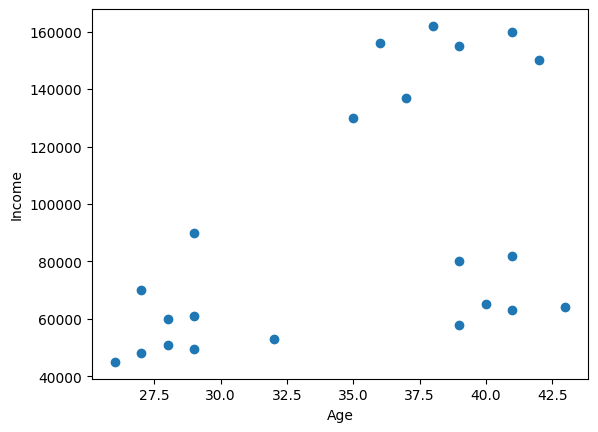

In [ ]:
plt.scatter(pf['Age'],pf['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [ ]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3)
y_predicted=km.fit_predict(pf[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
pf['cluster']=y_predicted
pf.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [ ]:
print(km.cluster_centers_)

[[3.92000000e+01 1.56600000e+05]
 [3.32000000e+01 6.26333333e+04]
 [3.60000000e+01 1.33500000e+05]]


In [ ]:
X=km.cluster_centers_[:,0]
Y=km.cluster_centers_[:,1]

In [ ]:
pf1=pf[pf.cluster==0]
pf2=pf[pf.cluster==1]
pf3=pf[pf.cluster==2]

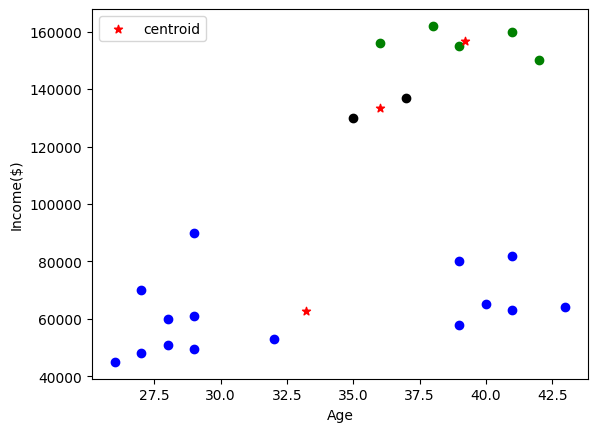

In [ ]:
plt.scatter(pf1.Age,pf1['Income($)'],color='green')
plt.scatter(pf2.Age,pf2['Income($)'],color='blue')
plt.scatter(pf3.Age,pf3['Income($)'],color='black')
plt.scatter(X,Y,color='red',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

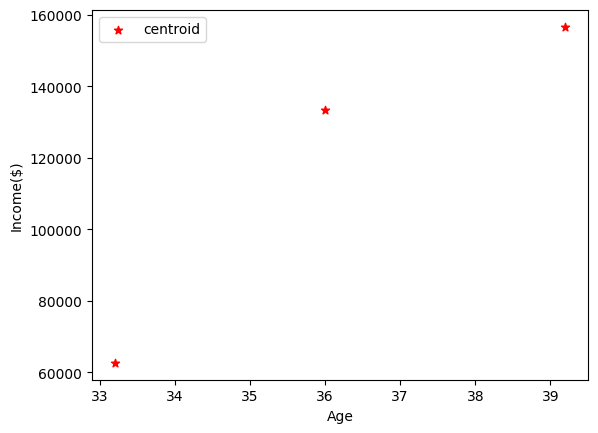

In [ ]:
plt.scatter(X,Y,color='red',marker='*',label='centroid')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(pf[['Income($)']])
pf[['Income($)']]
pf[['Income($)']]=scaler.transform(pf[['Income($)']])
scaler.fit(pf[['Age']])
pf[['Age']]=scaler.transform(pf[['Age']])
pf.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(pf[['Income($)']])
pf[['Income($)']]=scaler.transform(pf[['Income($)']])
scaler.fit(pf[['Age']])
pf[['Age']]=scaler.transform(pf[['Age']])
pf.head()

In [ ]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(pf[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
pf['cluster']=y_predicted
pf.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [ ]:
X=km.cluster_centers_[:,0]
Y=km.cluster_centers_[:,1]

In [ ]:
pf1=pf[pf.cluster==0]
pf2=pf[pf.cluster==1]
pf3=pf[pf.cluster==2]

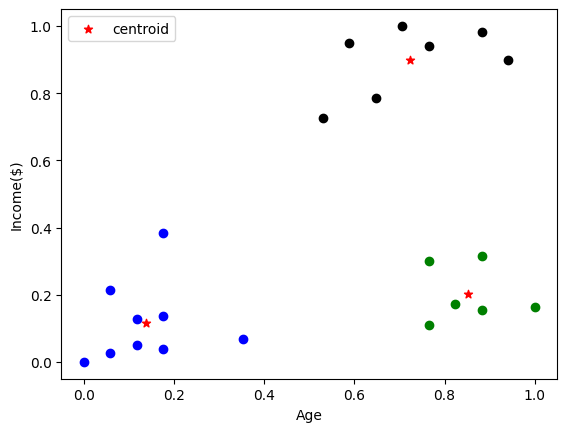

In [ ]:
plt.scatter(pf1.Age,pf1['Income($)'],color='green')
plt.scatter(pf2.Age,pf2['Income($)'],color='blue')
plt.scatter(pf3.Age,pf3['Income($)'],color='black')
plt.scatter(X,Y,color='red',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [ ]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(pf[['Age','Income($)']])
  sse.append(km.inertia_)

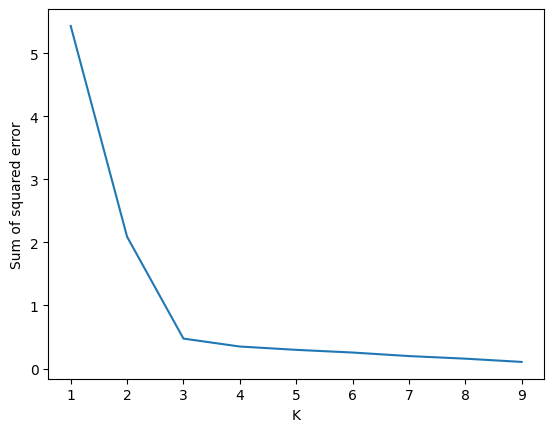

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()